# Topic Model Analysis

This notebook serves to analyze outputs from the topic model from Reddit posts and comments.

### 1. Initial Groupings from 7/1/22

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

In [157]:
# Import our sample annotation file.
relevant_cols = ['keywords', 'keywords_id', 'sentiment']
annotations = pd.read_csv('/Users/ssomani/Desktop/topic_model_sample_annotation.csv')[relevant_cols]

In [135]:
keyword_order = [30, 5, 23, 35, 36, 22, 28, 2, 1, 4, 27, 3, 15, -1, 33, 6, 10, 13, 18, 20, 7, 32, 34, 26, 17, 31, 12, 25, 24, 9, 16, 8, 29, 0, 11, 19, 21, 14, 37, 38]
column_order = ['drug_interact', 'dosage', 'cost', 'cognition', 'covid', 'drug_alternative', 'efficacy', 'lifestyle_alternative', 'side_effect', 'misc']

In [165]:
frequency_counts_df = pd.DataFrame(index=annotations['keywords_id'].unique(), columns=annotations['sentiment'].unique()).fillna(0)
frequency_counts_df = frequency_counts_df.loc[keyword_order, column_order]

In [166]:
for i in annotations.iterrows():
    if i[1]['sentiment'] in column_order:
        frequency_counts_df.loc[i[1]['keywords_id'], i[1]['sentiment']] += 1
        
frequency_counts_normalized = frequency_counts_df.T / frequency_counts_df.T.sum(axis=0)

In [167]:
frequency_counts_df.sum(axis=0).sort_values()

drug_interact             12
dosage                    12
cost                      16
cognition                 18
covid                     28
drug_alternative          39
efficacy                  91
lifestyle_alternative    133
side_effect              136
misc                     157
dtype: int64

Text(0.5, 1.0, 'Comparing BertTopics vs. Manual Topic Labeling')

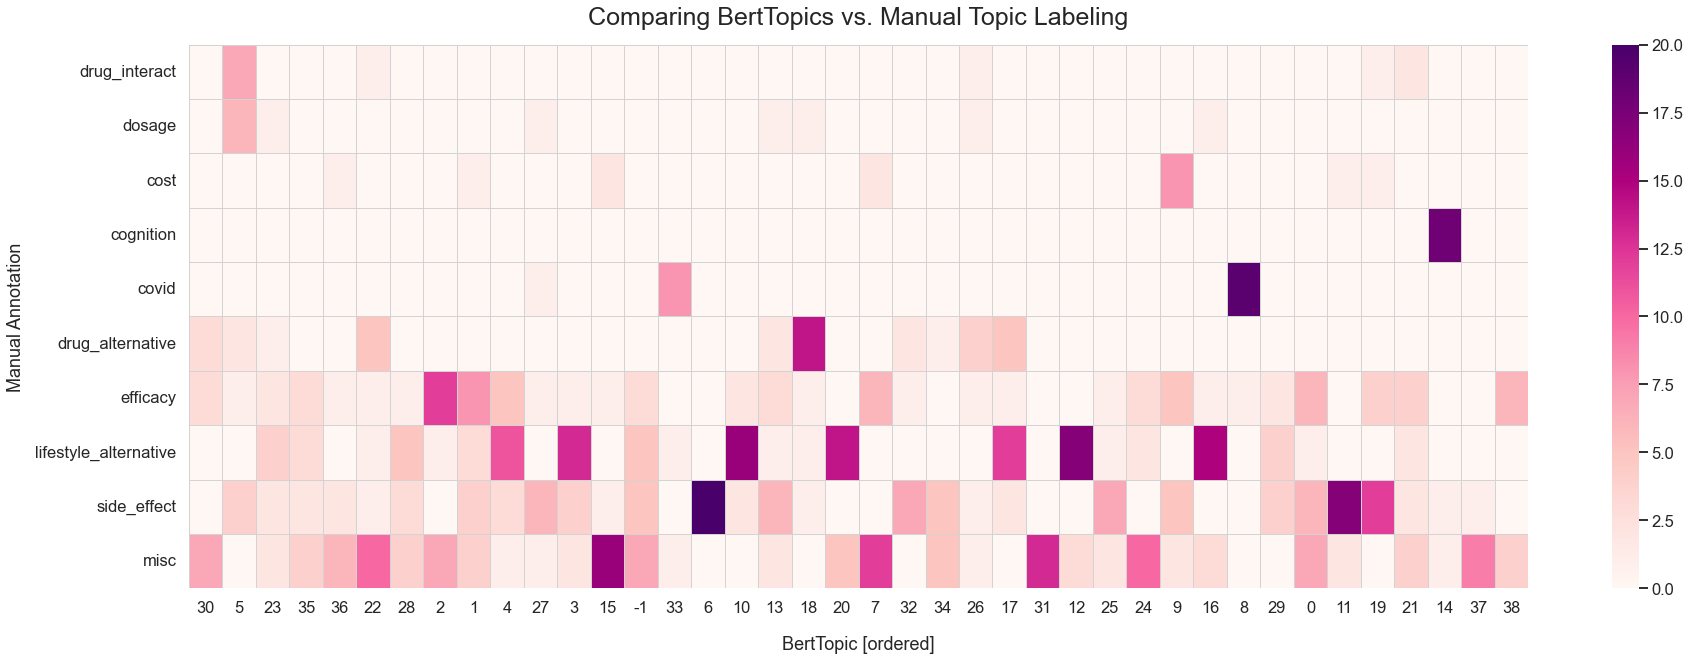

In [139]:
plt.figure(figsize=(30, 10))
ax = sns.heatmap(frequency_counts_df.T, cmap='RdPu', linewidths=0.5, linecolor='lightgray')
ax.set_ylabel('Manual Annotation', labelpad=10)
ax.set_xlabel('BertTopic [ordered]', labelpad=20)
ax.set_title('Comparing BertTopics vs. Manual Topic Labeling', fontdict={'fontsize': 25}, pad=20)

Text(0.5, 1.0, 'Comparing BertTopics vs. Manual Topic Labeling')

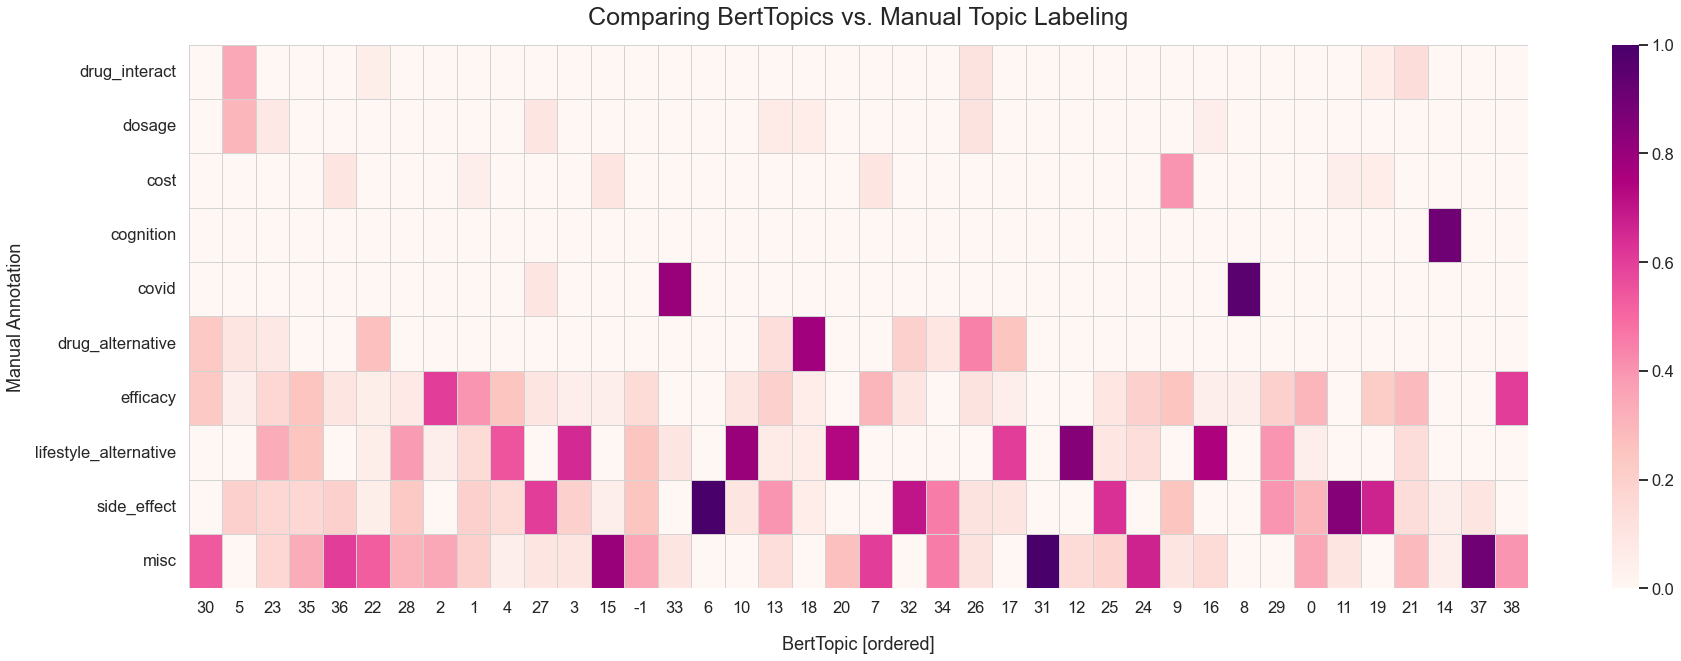

In [168]:
plt.figure(figsize=(30, 10))
ax = sns.heatmap(frequency_counts_normalized, cmap='RdPu', linewidths=0.5, linecolor='lightgray')
ax.set_ylabel('Manual Annotation', labelpad=10)
ax.set_xlabel('BertTopic [ordered]', labelpad=20)
ax.set_title('Comparing BertTopics vs. Manual Topic Labeling', fontdict={'fontsize': 25}, pad=20)

In [147]:
'_'.join(annotations.iloc[0, 0].split('\'')[1::2])

'10mg_dose_20mg_rosuvastatin_taking_day_simvastatin_cholesterol_lipitor_niacin'

In [158]:
annotations['keywords_mapped'] = annotations['keywords'].apply(lambda x: '_'.join(x.split('\'')[1:11:2]))

In [160]:
annotations.drop_duplicates('keywords_id')[['keywords_mapped', 'keywords_id']].set_index('keywords_id').loc[keyword_order].to_csv('/Users/ssomani/Desktop/keywords_keywordid.csv')

### 2. Groupings from 7/17/22

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

In [11]:
df = pd.read_csv('/Users/ssomani/Desktop/validation/df_topics_reduced_topics.csv')
df['keywords'] = df['keywords'].apply(lambda x : "_".join(x.split('\'')[1::2]))

In [19]:
df.groupby('clusters')['keywords'].value_counts()

clusters  keywords                                                              
0         the_to_and_of_is_you_that_in_for_statin                                   4706
          my_and_to_keto_on_was_the_it_for_me                                       2787
1         mortality_trials_the_in_of_risk_group_reduction_statins_prevention         115
          2005_trials_rules_endpoints_studies_data_results_mortality_you_the          22
2         cholesterol_chd_that_is_level_people_diseases_of_in_essential               23
                                                                                    ... 
9         pain_muscle_joint_statin_cramps_sore_it_stopped_workout_if                  46
          lipitor_ldl_my_dosing_mg_was_it_after_down_about                            26
          rosuvastatin_10mg_atorvastatin_ldl_mg_dose_your_drop_my_im                  25
          repatha_my_had_side_pain_approved_praluent_effects_muscle_cardiologist      18
          lipitor_sue_side_hi

In [46]:
overlap = pd.DataFrame(index=np.arange(1, 10), columns=df['topics'].unique()).fillna(0)
for row in df.loc[df['clusters'] != 0].iterrows():
    overlap.loc[row[1]['clusters'], row[1]['topics']] += 1

In [48]:
df['clusters'].value_counts()

0    7493
7     945
6     672
8     407
4     344
5     280
9     189
1     137
3      50
2      36
Name: clusters, dtype: int64

In [68]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.groupby('clusters')['keywords'].value_counts())

clusters  keywords                                                                                
0         the_to_and_of_is_you_that_in_for_statin                                                     4706
          my_and_to_keto_on_was_the_it_for_me                                                         2787
1         mortality_trials_the_in_of_risk_group_reduction_statins_prevention                           115
          2005_trials_rules_endpoints_studies_data_results_mortality_you_the                            22
2         cholesterol_chd_that_is_level_people_diseases_of_in_essential                                 23
          egg_eggs_consumption_cholesterol_ce_of_cvd_in_the_yolk                                        13
3         lipitor_patent_drug_profitable_company_that_pfizer_is_market_mars                             27
          market_statin_pulled_testified_drugs_baycol_fdas_graham_funded_pharma                         23
4         statin_take_you_taking_youre_gun_on

In [78]:
i = 2

print(df.loc[df['topics'] == -1, 'texts'].iloc[i])
print(df.loc[df['topics'] == -1, 'keywords'].iloc[i])

High-compliance placebo subjects fare better than low-compliance placebo subjects: Why the recently-touted statin study proves little. 
the_to_and_of_is_you_that_in_for_statin


Text(0.5, 1.0, 'Comparing BertTopics and UMAP Clustering')

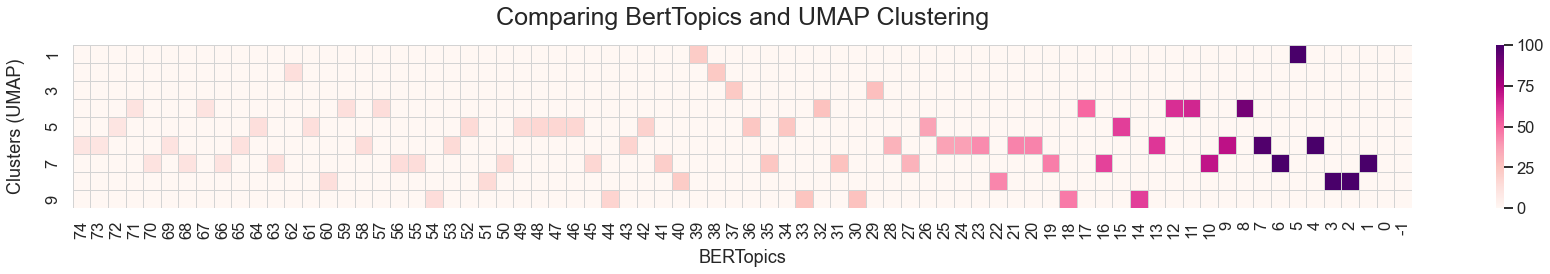

In [61]:
plt.figure(figsize=(30, 3))
ax = sns.heatmap(overlap, cmap='RdPu', linewidths=0.5, linecolor='lightgray', vmax=100)
ax.set_xlabel('BERTopics', labelpad=10)
ax.set_ylabel('Clusters (UMAP)', labelpad=20)
ax.set_title('Comparing BertTopics and UMAP Clustering', fontdict={'fontsize': 25}, pad=20)